## Boston AirBnB open data with the CRISP-DM (Cross Industry Process for Data Mining)

To get general AirBnB business insight, the Boston data from AirBnB will be analyzed based on the CRISP-DM. The subprocesses of the CRISP-DM are written below.

`1`. Business Understanding

`2`. Data Understanding

`3`. Prepare Data

`4`. Data Modeling

`5`. Evaluate the Results

`6`. Deploy

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar #To check holidays in the U.S
import time
import copy
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from functions_for_AirBnB import * # a file having necessary functions for preparing data

In [2]:
# Load the AirBnB files
df_listing, df_calendar = load_bnb_files()

## 1. Business Understanding

Business Questions 
- How is the price of Airbnb adjusted in terms of seasons and locations?
- What are the most relevant features of the groups over the 80 percentile and under the 20 percentile?
- What are the distinctive features in the 80 percetile group for 2 people travellers and more than 4 people travellers?
    

## 2. Data Understanding

Check and play around the dataframes loaded before to get some idea or to get the business quesations progressed.
### 2.1. For df_listing

In [3]:
# Setting option for seeing the whole columns of dataframes
pd.set_option('display.max_columns', None)  

In [4]:
print(df_listing.shape)
df_listing.head(n=5)

(3585, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [5]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

Index(['notes', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'has_availability', 'license',
       'jurisdiction_names'],
      dtype='object')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

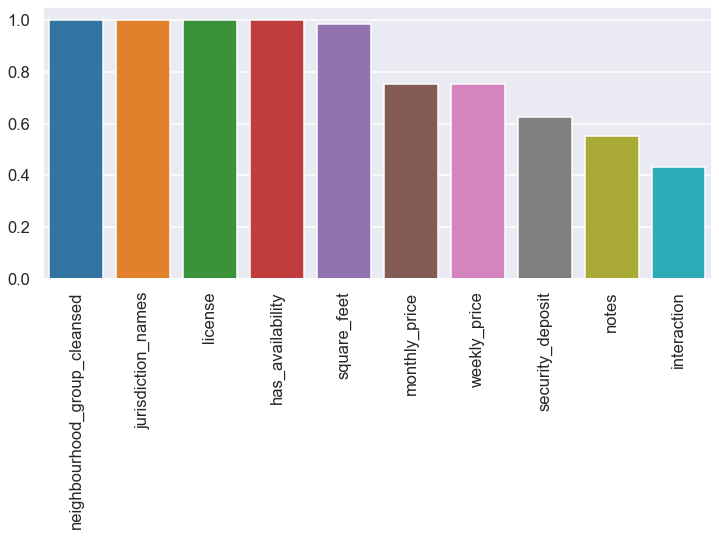

In [6]:
# Check columns that having missing values over 50%
df_missing = df_listing.isna().mean()
print(df_missing[df_missing>0.5].index)
df_missing.sort_values(ascending=False)[0:10]
testframe = pd.DataFrame(df_missing.sort_values(ascending=False)[0:10]).T
testframe.head()


sns.set_style("darkgrid")
sns.set_context("talk")
figure, axes = plt.subplots(figsize=(12,5))
ax0 = sns.barplot(data=testframe)
plt.xticks(rotation=90)

In [7]:
print("# of id:",df_listing.id.unique().size)
print("# of host_id:",df_listing.host_id.unique().size)
# There are some hosts who take care of more than two ids

# of id: 3585
# of host_id: 2181


# of accommodates: [ 4  2  3  5  1  8  6 16  7  9 10 12 11 14]
Int64Index([2, 4, 1, 3, 5, 6, 8, 7, 10, 9, 12, 11, 14, 16], dtype='int64')

Accomodates equal or less than 2 is 53.61 %
Accomodates more than 2 is 42.57 %


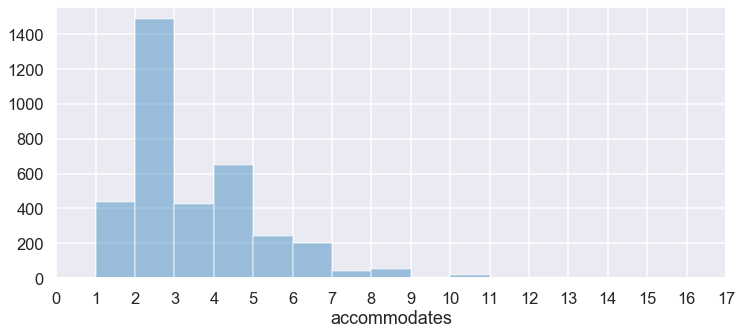

In [8]:
# Check the number of accomodates in the dataframe
print("# of accommodates:",df_listing.accommodates.unique())
tmp = df_listing.accommodates.value_counts(ascending=False)/df_listing.accommodates.size
print(tmp.index)
print()
print("Accomodates equal or less than 2 is {:5.2f} %".format((tmp[1]+tmp[2])*100))
print("Accomodates more than 2 is {:5.2f} %".format((tmp[3]+tmp[4]+tmp[5]+tmp[6])*100))

sns.set_style("darkgrid")
sns.set_context("talk")
figure, axes = plt.subplots(figsize=(12,5))
ax0 = sns.distplot(df_listing.accommodates, kde=False,  bins=15)
axes.set_xticks(np.arange(0, 18))


In [9]:
print("# of bed_type:",df_listing.bed_type.unique())

# of bed_type: ['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch']


### 2.2. For df_calendar

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

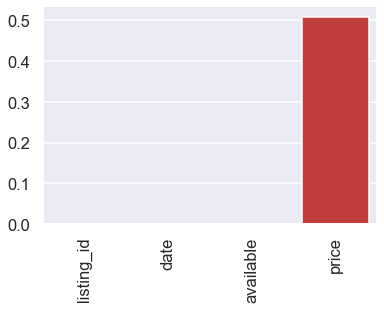

In [10]:
df_missing_calendar = df_calendar.isna().mean()
testframe = pd.DataFrame(df_missing_calendar.sort_values(ascending=True)).T

sns.set_style("darkgrid")
sns.set_context("talk")
figure, axes = plt.subplots()
ax0 = sns.barplot(data=testframe)
plt.xticks(rotation=90)


## 3. Prepare data

## Strategies
- Drop columns having missing values over 50%. The candidates columns to be dropped are 'notes', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'has_availability', 'license', 'jurisdiction_names'. Most of them are duplicated to other columns or irrelavant except  'security_deposit' column. I didn't do imputing by the mean or mode of the column because it can distort real shape. I didn't do one-hot-encoding to make the dataframe straightforward. 'security_deposit' has 55 unique values.
- Drop columns related with urls and other irrelevant columns
- Drop columns having only one value or a duplicated column
- Check which columns are numerical or categorical
- Change a categorical colums having massive different values into a two boolean columns to save information
- Use one hot encoding to categorical features having suitable values 
- Impute columns having missing values over 30% to replace missing values with the mean values of corresponding columns
 

## Modifying df_calendar

In [11]:
# Get columns of year, month, day, weekday, us_holiday 
df_cal_modified = modify_calendar(df_calendar)

In [12]:
print(df_cal_modified.shape[0]/365)
# Each listing_id has 365 rows

3586.0


## Answer 1

<Figure size 864x360 with 0 Axes>

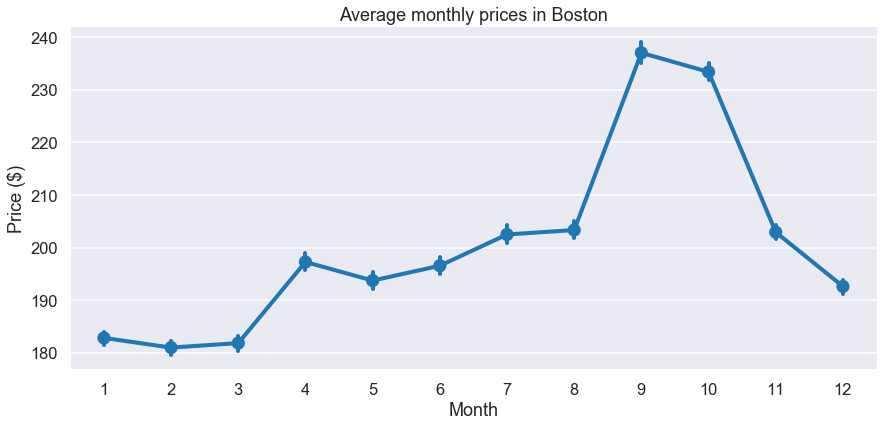

In [13]:
# Average price per month
plt.figure(figsize=(12,5))
sns.set_style("darkgrid")
sns.set_context("talk")
plot_price_month = sns.catplot(x='month', y='price', data=df_cal_modified, kind="point", height=6, aspect=2.1)
plot_price_month = plot_price_month.set_axis_labels("Month", "Price ($)")
plot_price_month.ax.set_title("Average monthly prices in Boston")
plot_price_month.savefig("plot1.png")

<Figure size 864x360 with 0 Axes>

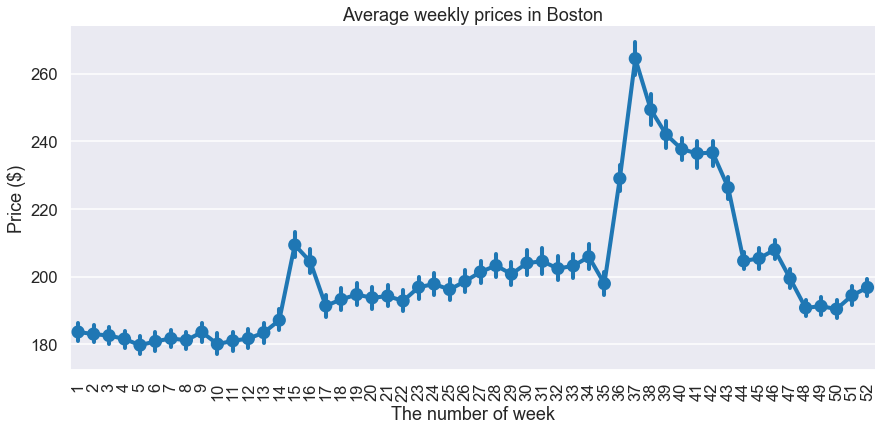

In [14]:
# Avereage price per weeknumber
plt.figure(figsize=(12,5))
sns.set_style("darkgrid")
sns.set_context("talk")
plot_price_week = sns.catplot(x='week_number', y='price', data=df_cal_modified, kind="point", height=6, aspect=2.1, rc={'font.size':10})
plot_price_week = plot_price_week.set_axis_labels("The number of week", "Price ($)")
plt.xticks(rotation=90)
plot_price_week.ax.set_title("Average weekly prices in Boston")
plot_price_week.savefig("plot2.png")

There are 2 sudden increases. They happens at around Week 15,16 and Week 36,37. I guess the reason of the first one is obvious that Boston Marathon, one of the famous marathon event, is regulary held on the third Monday of April. The second one is might be coming from the begining of new academic year. There are a lot of world' presitigious universities in Boston area. I think new students or faculty members might use Airbnb service to find their permenant stays.

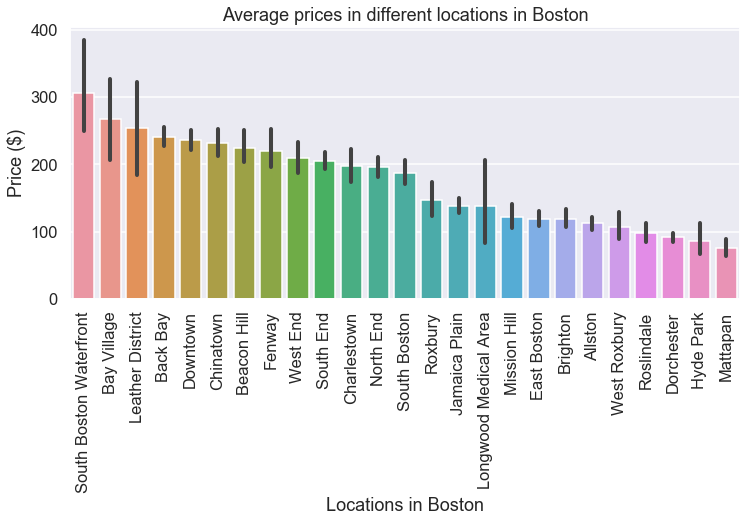

In [15]:
# Average price per location
df_listing.price.head()
df_listing.price = df_listing.price.str.replace('$','')
df_listing.price = df_listing.price.str.replace(',','')
df_listing.price = df_listing.price.astype(float)
sort = df_listing.groupby(["neighbourhood_cleansed"])['price'].mean().sort_values(ascending=False)

sns.set_style("darkgrid")
sns.set_context("talk")
figure, axes = plt.subplots(figsize=(12,5))
plot_price_place = sns.barplot(x='neighbourhood_cleansed', y='price', data=df_listing, order=sort.index)
axes.set_xlabel('Locations in Boston')
axes.set_ylabel('Price ($)')
axes.set_title("Average prices in different locations in Boston")
plt.xticks(rotation=90)
figure.savefig('plot3.png')

In [16]:
print(df_listing.shape)

(3585, 95)


## Cleaning df_listing : 
- Removing irrelevant columns 
- Changing object type columns to numeric columns or manipulating them using one hot encoding (categorical values)
- Filling NaN values (missing values : imputing or dropping)
- Creating an integrated_score_log column by the natural log of the result from 'review_scores_rating' times 'number_of_reviews' +1 

In [17]:
df_listing, df_calendar = load_bnb_files()
df_cal_modified = modify_calendar(df_calendar)
# Put the df_listing dataframe together with the columns coming from modify_calendar(df_calendar)
# The new added columns are  new 'unavail_days', 'avail_days_weekends', 'avail_days_weekdays', 
# 'price_weekend', and 'price_weekday' 
df_listing = add_availabledays_price(df_listing, df_cal_modified)
df_listing_modi2 = clean_listing_df(df_listing)  

df_listing_modi2.shape

(3585, 268)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


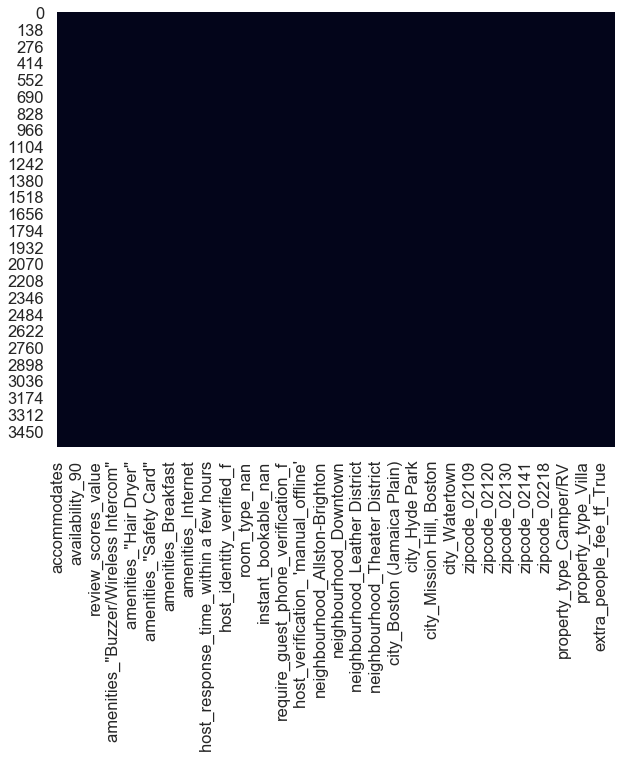

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_listing_modi2.isnull(), cbar=False)
check_null=list(df_listing_modi2.isnull().sum())
print(check_null)


In [19]:
df_listing_modi2.head()
df_listing_modi2.columns.tolist()

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'guests_included',
 'minimum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'unavail_days',
 'avail_days_weekends',
 'avail_days_weekdays',
 'price_weekend',
 'price_weekday',
 'amenities_"24-Hour Check-in"',
 'amenities_"Air Conditioning"',
 'amenities_"Buzzer/Wireless Intercom"',
 'amenities_"Cable TV"',
 'amenities_"Carbon Monoxide Detector"',
 'amenities_"Elevator in Building"',
 'amenities_"Family/Kid Friendly"',
 'amenities_"Fire Extinguisher"',
 'amenities_"First Aid Kit"',
 'amenities_"Free Parking on Premises"',
 'amenities_"Free Parking on Street"',
 'amenities_"Hair Dryer"',
 'amenities_"Hot Tub"',
 'amenities_"Indoor 

In [20]:
print(df_listing_modi2.integrated_score_log.describe())
print(df_listing_modi2.integrated_score_log.quantile(0.8))
print(df_listing_modi2.integrated_score_log.quantile(0.21))
print(df_listing_modi2.integrated_score_log.quantile(0.2109))

count    3585.000000
mean        5.325527
std         3.041916
min         0.000000
25%         4.531703
50%         6.175867
75%         7.566828
max        10.358155
Name: integrated_score_log, dtype: float64
7.836368513676909
0.0
2.63533862209331


# of accommodates: [ 4  2  3  5  1  8  6 16  7  9 10 12 11 14]
Int64Index([2, 4, 1, 3, 5, 6, 8, 7, 10, 9, 12, 11, 14, 16], dtype='int64')

Accomodates equal or less than 2 is 53.61 %
Accomodates more than 2 is 42.57 %


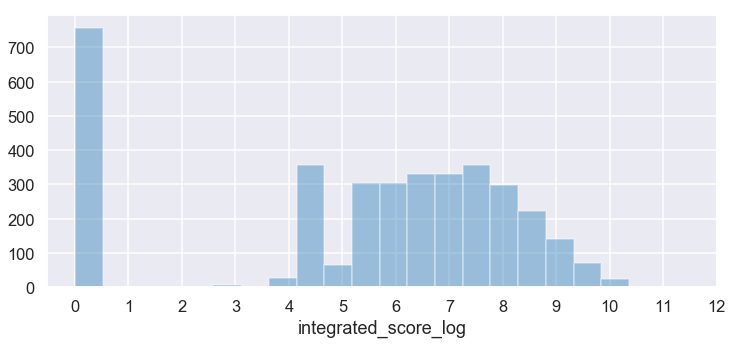

In [21]:
# Check the number of accomodates in the dataframe
print("# of accommodates:",df_listing.accommodates.unique())
tmp = df_listing.accommodates.value_counts(ascending=False)/df_listing.accommodates.size
print(tmp.index)
print()
print("Accomodates equal or less than 2 is {:5.2f} %".format((tmp[1]+tmp[2])*100))
print("Accomodates more than 2 is {:5.2f} %".format((tmp[3]+tmp[4]+tmp[5]+tmp[6])*100))

sns.set_style("darkgrid")
sns.set_context("talk")
figure, axes = plt.subplots(figsize=(12,5))
ax0 = sns.distplot(df_listing_modi2.integrated_score_log, kde=False,bins=20) 
axes.set_xticks(np.arange(0, 13,1))


In [22]:
# Conditioning df_listing_modi2 frame to categorize the dataset into poor, normal, high earner groups
df_listing_modi3 = conditioning_listing_df(df_listing_modi2)

In [23]:
df_listing_modi3.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_nan,city_ALLSTON,city_Allston,city_Boston,city_Boston,city_Boston (Charlestown),city_Boston (Jamaica Plain),"city_Boston, Massachusetts, US",city_Brighton,city_Brighton,city_Brookline,city_Cambridge,city_Charlestown,city_Dorchester,city_East Boston

## Data modeling

In [24]:
# Store the 'y_label' feature in a new variable and remove it from the dataset
target = df_listing_modi3['y_label']
df_listing_modi3 = df_listing_modi3.drop('y_label', axis = 1)

In [25]:
df_listing_modi3.head(n=3)

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_nan,city_ALLSTON,city_Allston,city_Boston,city_Boston,city_Boston (Charlestown),city_Boston (Jamaica Plain),"city_Boston, Massachusetts, US",city_Brighton,city_Brighton,city_Brookline,city_Cambridge,city_Charlestown,city_Dorchester,city_East Boston

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_listing_modi3, target, test_size=0.3, random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)

(2509, 254)
(1076, 254)


In [28]:
model_list = [RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier]
train_list = []
test_list = []

for i in model_list:
    model = i(n_estimators=200)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_list.append(train_accuracy)
    test_list.append(test_accuracy)
    print(i,"Accuracy for training data:",train_accuracy)
    print(i,"Accuracy for testing data:", test_accuracy)

<class 'sklearn.ensemble.forest.RandomForestClassifier'> Accuracy for training data: 0.9996014348345954
<class 'sklearn.ensemble.forest.RandomForestClassifier'> Accuracy for testing data: 0.7304832713754646
<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> Accuracy for training data: 0.6632124352331606
<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> Accuracy for testing data: 0.6496282527881041
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> Accuracy for training data: 0.8632921482662416
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> Accuracy for testing data: 0.7351301115241635


In [29]:
# # Use GridSearch to find better hyperparameters for RandomForestClassifier
# start = time.time()
# classifier = RandomForestClassifier()
# param_for_rfc = {'n_estimators':[50,100,150,200,300], 'max_features':[30,40,50], "max_depth":[10,15,20]}
# # scoring = {'accuracy': make_scorer(accuracy_score)}
# grid_classifier = GridSearchCV(classifier, param_for_rfc, cv=10, return_train_score=True, n_jobs=-1)
# grid_classifier.fit(X_train, y_train)
# result = grid_classifier.cv_results_
# print("time to excute:", time.time() - start)
# grid_classifier.best_estimator_

In [30]:
# Define the classifier, and fit it to the data
model = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, max_features=50,
                               max_depth=15, bootstrap=True)
model.fit(X_train, y_train)
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_list.append(train_accuracy)
test_list.append(test_accuracy)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.9477879633320048
The test accuracy is 0.724907063197026


## Evaluate and Results of Feature Importances

In [31]:
importances = model.feature_importances_ 
print(len(importances))
print()
# print(importances)

indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices[:16]]
values = importances[indices][:16]

tmp = 0
print("Feature     /    Importance value:")
for i,j in zip(columns, values):
    print(i,"/",j)
    tmp += j
    
print()    
print("The sum of 16 values of importance:", tmp)

254

Feature     /    Importance value:
host_verification_ 'reviews' / 0.10084791156440995
price_weekday / 0.04661198649659285
avail_days_weekdays / 0.045789679087538726
price_weekend / 0.045432550710985155
unavail_days / 0.04435173699316741
avail_days_weekends / 0.039754596212035156
cleaning_fee / 0.03618921571208748
minimum_nights / 0.023927600899187308
host_is_superhost_t / 0.020390409221763113
host_is_superhost_f / 0.017989700611642505
accommodates / 0.01774908629949261
host_response_time_nan / 0.01720472517944164
host_response_time_within an hour / 0.014992054907016883
house_rules_exist_tf_False / 0.012657295110544446
house_rules_exist_tf_True / 0.012000534613281823
beds / 0.010550966072330905

The sum of 16 values of importance: 0.506440049691518


The sum of top 15 values of importance takes up to the half of the total importance. So, it is worth to check the 'high' and 'low' performance groups using these features.
These features can be summarized into 10 fields. 
 
- 'host_verification' :  'reviews' 
- 'price' : both weekday and weekend
- 'available day'  :  both weekday and weekend
- 'cleaning_fee' 
- 'minimum_nights'
- 'host_is_superhost' : superhost or not
- 'accommodates'
- 'host_response_time' : within an hour and none
- 'house_rules_exist' : exist or not exist
- "instant_bookable" : True or not

This results are going to be evaluated together with the result of PCA.

## PCA

In [32]:
# Apply feature scaling to the general population demographics data.
scaler = StandardScaler()
column_list = list(df_listing_modi3.columns)
scaled_values = scaler.fit_transform(df_listing_modi3.values)
df_listing_scaled = pd.DataFrame(scaled_values, index=df_listing_modi3.index, columns=df_listing_modi3.columns)
df_listing_scaled.shape

(3585, 254)

In [33]:
# Apply PCA to the data.
pca = PCA(n_components=200)
pca.fit(df_listing_scaled)

# Investigate the variance accounted for by each principal component.
tmp1 = 0
tmp2 = 0
for i in pca.explained_variance_ratio_:
    tmp1 += 1
    tmp2 += i
    print(tmp1, tmp2)
    if tmp2 > 0.9:
        break

1 0.03538285360743003
2 0.06663428246647694
3 0.08615212672372496
4 0.10304210163740714
5 0.11948203048863792
6 0.13413239420761805
7 0.14767302739658564
8 0.16105892748657233
9 0.1736672380560505
10 0.18552347532189314
11 0.1972559436195228
12 0.20884098115350824
13 0.2200215745651855
14 0.23092717537577284
15 0.24175600239845876
16 0.25218499865797217
17 0.262245242287125
18 0.27211364783090575
19 0.28196995753335485
20 0.2915618663014341
21 0.3009859189907713
22 0.3103226318318154
23 0.31950558848904637
24 0.3286602370719134
25 0.33770823238559433
26 0.3465677368392469
27 0.35521699918866595
28 0.3637853885063854
29 0.3721616707086945
30 0.38046528291920956
31 0.388727461682335
32 0.39685427014004676
33 0.4049460771236415
34 0.41276918232762955
35 0.4204630136796092
36 0.4280085766330691
37 0.4355300622527375
38 0.44293501905952515
39 0.4502488663320483
40 0.45741349976973356
41 0.4644631222407473
42 0.4712775908211658
43 0.47807369431582886
44 0.48471950173943595
45 0.4912457569988

In [34]:
# Apply PCA to the data.
pca = PCA(n_components=142, random_state=42)
pca.fit(df_listing_scaled)

PCA(copy=True, iterated_power='auto', n_components=142, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
# Transform scaled dataframe
df_listing_scaled_transformed = pca.fit_transform(df_listing_scaled)
df_listing_scaled_transformed = pd.DataFrame(df_listing_scaled_transformed)
# Create new dataframe using 'df_listing_scaled_transformed' and 'target'
new_df = pd.concat([df_listing_scaled_transformed, target], axis=1)
new_df_total = new_df[new_df.y_label != 'normal']
new_df_total.y_label.unique()
new_df_total.head()
new_df_total = new_df_total.add_prefix('pca_')
new_df_total = new_df_total.rename(columns={"pca_y_label": "performance group"})
new_df_total.head(n=3)

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,pca_40,pca_41,pca_42,pca_43,pca_44,pca_45,pca_46,pca_47,pca_48,pca_49,pca_50,pca_51,pca_52,pca_53,pca_54,pca_55,pca_56,pca_57,pca_58,pca_59,pca_60,pca_61,pca_62,pca_63,pca_64,pca_65,pca_66,pca_67,pca_68,pca_69,pca_70,pca_71,pca_72,pca_73,pca_74,pca_75,pca_76,pca_77,pca_78,pca_79,pca_80,pca_81,pca_82,pca_83,pca_84,pca_85,pca_86,pca_87,pca_88,pca_89,pca_90,pca_91,pca_92,pca_93,pca_94,pca_95,pca_96,pca_97,pca_98,pca_99,pca_100,pca_101,pca_102,pca_103,pca_104,pca_105,pca_106,pca_107,pca_108,pca_109,pca_110,pca_111,pca_112,pca_113,pca_114,pca_115,pca_116,pca_117,pca_118,pca_119,pca_120,pca_121,pca_122,pca_123,pca_124,pca_125,pca_126,pca_127,pca_128,pca_129,pca_130,pca_131,pca_132,pca_133,pca_134,pca_135,pca_136,pca_137,pca_138,pca_139,pca_140,pca_141,performance group
0,-1.332802,-0.923894,-0.088580,-2.822502,4.940919,2.388069,1.340657,0.528226,-0.801351,0.131687,-0.190819,-0.186262,-0.460469,0.140799,-0.235456,-0.236942,3.218601,3.101298,0.503059,-2.089410,2.368750,0.095377,-2.718736,-0.772819,-3.697302,1.216734,0.591613,4.126742,-0.087335,-2.986226,-4.065500,0.444044,-0.959194,1.580214,-1.078248,-0.854905,-0.527120,-0.338453,0.473872,-0.184735,1.003865,0.040537,0.464061,-0.001331,-0.237560,0.166367,0.017744,-0.591244,0.862729,-0.979512,0.059056,1.018056,-0.748430,-0.019431,1.093600,-0.764569,-0.238654,0.248037,-0.794904,0.004219,-0.802852,1.167872,-0.124902,0.148894,-0.122292,-0.662210,-0.251103,1.051336,-0.222030,-0.014009,0.363539,-0.293257,-0.366244,0.988582,-0.470385,0.282988,-1.007859,0.267727,-0.474475,0.282741,-0.141750,0.038028,-0.287134,0.306890,1.244045,-0.993518,0.132913,-0.365823,0.018363,0.413480,-0.484527,0.198397,-0.081765,-0.204131,-0.701059,-0.284236,-0.190264,-0.246164,-0.802278,-0.640352,-0.086449,-0.349265,1.496109,1.046111,-0.486414,0.286251,1.145576,1.000035,-0.261205,-0.079303,-0.148005,0.653631,-0.593246,0.086242,1.239862,0.064857,0.452142,-2.000983,0.738027,-0.008364,0.189047,0.490642,-0.218413,1.128758,0.332837,-1.274812,1.156792,0.211116,0.809705,0.081020,-2.179811,-2.733477,0.925225,-1.748811,0.011368,1.230459,0.249053,-0.449444,1.635986,-0.890783,0.241384,-0.452968,poor
1,-1.674096,4.565225,0.957300,-0.536084,-1.664085,0.670241,0.129245,0.227173,-0.116965,2.668298,-1.238372,-0.341575,0.089922,-0.097835,1.221538,-1.279003,3.620258,2.502534,2.970155,-3.121914,0.360809,-0.399463,-3.882419,-1.094057,-4.915324,-0.576108,1.233339,3.644379,-0.616954,-3.929810,-0.708399,1.926509,-1.021252,2.094782,-1.718871,-1.082126,-1.013615,1.757770,-0.586492,1.440123,-0.074205,-0.895684,-0.373286,-1.147843,2.102292,-0.278202,-0.028466,-0.117254,1.677643,-2.214126,1.775995,2.341246,-0.824887,1.336206,0.024018,-1.795054,-1.930997,-0.823352,0.302051,-1.113109,-1.899897,0.365428,0.037246,0.637618,-0.016720,-1.154668,0.898025,0.710199,-0.109439,0.286645,-1.798712,-0.114259,-0.022162,1.698152,0.094241,-0.469874,0.552049,0.511977,-0.389467,-0.237294,0.395838,-1.708781,-0.196472,-0.388702,2.304291,0.026591,0.548224,-0.381141,-0.359710,0.517662,-0.516137,0.475989,-0.221866,-0.587600,-0.827032,0.006426,0.154047,-0.571224,-0.868242,-0.331030,-0.590311,-0.489854,1.737813,1.256559,0.241846,-0.232743,0.538692,0.979934,1.108391,-0.262167,-1.049283,1.000773,-0.376893,0.317913,0.133103,0.777809,0.997463,-0.440505,1.306665,0.004703,0.068120,2.584008,0.051296,2.167514,-0.285059,-2.840698,0.984461,-0.717260,-0.593177,0.198299,-1.771837,-0.733160,-0.614349,-1.208094,0.516295,-0.587529,-0.206032,-0.169295,2.349315,-2.127397,0.195224,-0.969454,high
2,-2.036366,3.504907,6.111917,-3.305770,-0.244532,0.249485,-2.224534,-2.495255,2.072361,0.095369,0.318941,-0.647656,-0.013153,-0.840983,0.485916,0.083711,3.412748,-0.713972,0.047915,-5.868092,3.253918,0.363965,-0.339369,-2.140791,-4.4

In [36]:
# # Compare mean values of pca components from the two dataframes
# # Collect mean value of each pca component
# poor_array = new_df_poor.describe().iloc[1:2].to_numpy().flatten()
# high_array = new_df_high.describe().iloc[1:2].to_numpy().flatten()
# df_compare = pd.DataFrame()
# df_compare['poor'] = poor_array
# df_compare['high'] = high_array
# df_compare['difference'] = df_compare['poor'] - df_compare['high']
# df_compare['difference'] = df_compare['difference'].abs()
# df_pca = df_compare.sort_values(by=['difference'], ascending=False).head(n=10)
# df_pca

## Answer 2

Text(0.5, 0.98, 'Boxplots of the top three pca components')

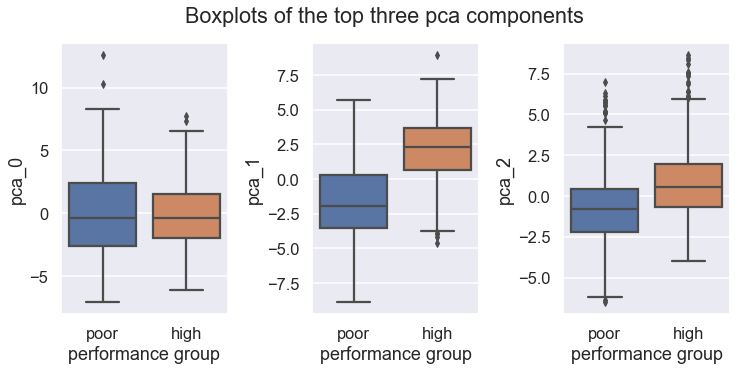

In [37]:
sns.set(font_scale=1.1)
sns.set_context("talk")
figure, axes = plt.subplots(1,3, figsize=(12,5))
figure.subplots_adjust(wspace=0.5)
ax0 = sns.boxplot(x='performance group', y='pca_0', data=new_df_total, ax=axes[0])
ax1 = sns.boxplot(x='performance group', y='pca_1', data=new_df_total, ax=axes[1])
ax3 = sns.boxplot(x='performance group', y='pca_2', data=new_df_total, ax=axes[2])
figure.suptitle("Boxplots of the top three pca components")

After comparing mean values of components of pca, it is found that pca1 and pca2 components are worth to be checked. 

In [38]:
# Load original df_listing_modi3 dataframe and attach label to analyze pca components
df_listing_modi3_with_label = pd.concat([df_listing_modi3, target], axis=1)
df_listing_modi3_with_label.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_nan,city_ALLSTON,city_Allston,city_Boston,city_Boston,city_Boston (Charlestown),city_Boston (Jamaica Plain),"city_Boston, Massachusetts, US",city_Brighton,city_Brighton,city_Brookline,city_Cambridge,city_Charlestown,city_Dorchester,city_East Boston

In [39]:
df_listing_poor = df_listing_modi3_with_label[df_listing_modi3_with_label.y_label == 'poor']
df_listing_high = df_listing_modi3_with_label[df_listing_modi3_with_label.y_label == 'high']
df_listing_total = pd.concat([df_listing_poor, df_listing_high])
df_listing_total = df_listing_total.rename(columns={"y_label": "performance_group"})
df_listing_total.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_nan,city_ALLSTON,city_Allston,city_Boston,city_Boston,city_Boston (Charlestown),city_Boston (Jamaica Plain),"city_Boston, Massachusetts, US",city_Brighton,city_Brighton,city_Brookline,city_Cambridge,city_Charlestown,city_Dorchester,city_East Boston

In [40]:
#for pca1
pos_list_1, neg_list_1 = investigate(df_listing_scaled, pca, 1)
result_pca1_df = check_difference(pos_list_1, neg_list_1, df_listing_poor, df_listing_high)
result_pca1_df[0:10]

positive to pca1: [('host_response_rate_100_True', '0.207'), ('host_response_time_within an hour', '0.196'), ('extra_people_fee_tf_True', '0.180'), ('amenities_"Carbon Monoxide Detector"', '0.170'), ('amenities_"Hair Dryer"', '0.161'), ('amenities_Hangers', '0.158'), ('calendar_updated_1weekago_yes', '0.158'), ('amenities_"Smoke Detector"', '0.155'), ('amenities_Shampoo', '0.154'), ('amenities_Iron', '0.152')]

negative to pca1: [('host_response_rate_100_False', '-0.207'), ('extra_people_fee_tf_False', '-0.180'), ('calendar_updated_1weekago_more_than_1week', '-0.158'), ('host_response_time_nan', '-0.154'), ('house_rules_exist_tf_False', '-0.149'), ('host_is_superhost_f', '-0.140'), ('host_acceptance_rate_100_False', '-0.134'), ('property_type_Apartment', '-0.118'), ('amenities_"Elevator in Building"', '-0.115'), ('cancellation_policy_flexible', '-0.109')]



,high,poor,difference
host_response_rate_100_False,0.186890,0.619048,0.432158
host_response_rate_100_True,0.813110,0.380952,0.432158
house_rules_exist_tf_False,0.132497,0.554233,0.421736
host_response_time_within an hour,0.629010,0.257937,0.371073
extra_people_fee_tf_False,0.437936,0.787037,0.349101
extra_people_fee_tf_True,0.562064,0.212963,0.349101
host_response_time_nan,0.008368,0.310847,0.302478
cancellation_policy_flexible,0.145049,0.433862,0.288814
host_is_superhost_f,0.700139,0.982804,0.282665
"amenities_""Elevator in Building""",0.119944,0.357143,0.237199


Text(0.5, 0.98, 'Difference between the mean values of original features in pca1')

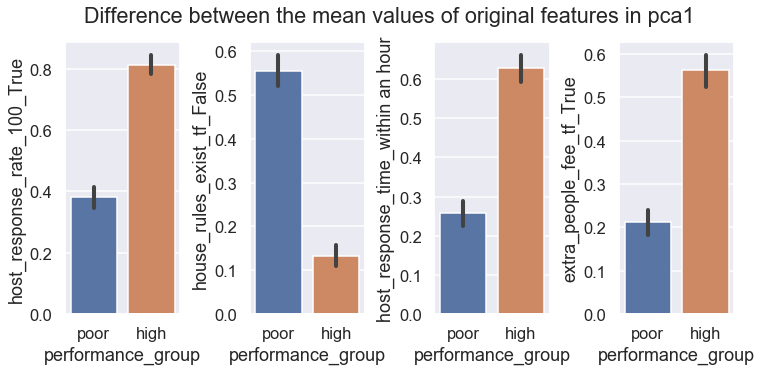

In [41]:
sns.set()
sns.set_context("talk")
figure, axes = plt.subplots(1,4, figsize=(12,5))
figure.subplots_adjust(wspace=0.6)
ax0 = sns.barplot(x='performance_group', y='host_response_rate_100_True',data=df_listing_total, ax=axes[0])
ax1 = sns.barplot(x='performance_group', y='house_rules_exist_tf_False',data=df_listing_total, ax=axes[1])
ax2 = sns.barplot(x='performance_group', y='host_response_time_within an hour',data=df_listing_total, ax=axes[2])
ax3 = sns.barplot(x='performance_group', y='extra_people_fee_tf_True', data=df_listing_total, ax=axes[3])
figure.suptitle("Difference between the mean values of original features in pca1")

We need to concentrate on 6 original features from df_listing dataframe, which are highly related with the pca1 component. 

- 'host_response_rate' : 100% or not
- 'house_rules' : exist or not
- 'host_response_time' : within an hour or not
- 'extra_people_fee' : exist or not
- 'cancellation_policy' : flexible or not
- 'host_is_superhost' : superhost or not

In [42]:
# For pca2
pos_list_2, neg_list_2 =  investigate(df_listing_scaled, pca, 2)
result_pca2_df = check_difference(pos_list_2, neg_list_2, df_listing_poor, df_listing_high)
result_pca2_df[0:10]

positive to pca2: [('avail_days_weekends', '0.275'), ('avail_days_weekdays', '0.272'), ('require_guest_phone_verification_t', '0.226'), ('cancellation_policy_super_strict_30', '0.174'), ('host_identity_verified_t', '0.160'), ('require_guest_profile_picture_t', '0.154'), ('host_response_time_within a few hours', '0.139'), ("host_verification_ 'reviews'", '0.130'), ('house_rules_exist_tf_True', '0.129'), ("host_verification_ 'phone'", '0.125')]

negative to pca2: [('unavail_days', '-0.273'), ('require_guest_phone_verification_f', '-0.226'), ('amenities_Hangers', '-0.176'), ('amenities_"Laptop Friendly Workspace"', '-0.172'), ('amenities_"Hair Dryer"', '-0.167'), ('amenities_Iron', '-0.165'), ('host_identity_verified_f', '-0.160'), ('require_guest_profile_picture_f', '-0.154'), ('amenities_Essentials', '-0.148'), ('host_response_time_nan', '-0.133')]



,high,poor,difference
unavail_days,131.564854,212.201058,80.636205
avail_days_weekdays,168.202232,109.603175,58.599057
avail_days_weekends,65.232915,43.678571,21.554343
house_rules_exist_tf_True,0.867503,0.445767,0.421736
host_verification_ 'reviews',1.000000,0.682540,0.317460
host_response_time_nan,0.008368,0.310847,0.302478
host_identity_verified_f,0.135286,0.416667,0.281381
host_identity_verified_t,0.864714,0.583333,0.281381
"amenities_""Hair Dryer""",0.564854,0.496032,0.068822
require_guest_profile_picture_f,0.938633,0.997354,0.058721


Text(0.5, 0.98, 'Difference between the mean values of original features in pca2')

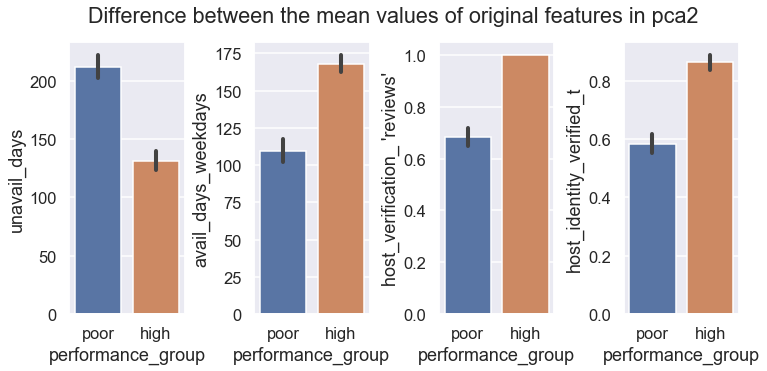

In [43]:
sns.set()
sns.set_context("talk")
figure, axes = plt.subplots(1,4, figsize=(12,5))
figure.subplots_adjust(wspace=0.6)
ax0 = sns.barplot(x='performance_group', y='unavail_days',data=df_listing_total, ax=axes[0])
ax1 = sns.barplot(x='performance_group', y="avail_days_weekdays",data=df_listing_total, ax=axes[1])
ax2 = sns.barplot(x='performance_group', y="host_verification_ 'reviews'",data=df_listing_total, ax=axes[2])
ax3 = sns.barplot(x='performance_group', y='host_identity_verified_t', data=df_listing_total, ax=axes[3])
figure.suptitle("Difference between the mean values of original features in pca2")

There could be 5 original features from df_listing dataframe, which are highly related with the pca2 component. 

- 'total available / unavailable days'
- 'house_rules' : exist or not
- 'host_verification' : 'reviews'
- 'host_response_time' : nan
- 'host_identity': verified or not

In [44]:
# Chekc also pca0 to find other relavant original features 
pos_list_0, neg_list_0 = investigate(df_listing_scaled, pca, 0)
result_pca0_df = check_difference(pos_list_0, neg_list_0, df_listing_poor, df_listing_high)
result_pca0_df[0:10]

positive to pca0: [('room_type_Entire home/apt', '0.240'), ('price_weekday', '0.231'), ('price_weekend', '0.230'), ('accommodates', '0.205'), ('amenities_"Cable TV"', '0.175'), ('cleaning_fee', '0.174'), ('amenities_Gym', '0.172'), ('amenities_"Elevator in Building"', '0.170'), ('amenities_TV', '0.166'), ('beds', '0.154')]

negative to pca0: [('room_type_Private room', '-0.228'), ('cancellation_policy_flexible', '-0.126'), ('require_guest_phone_verification_f', '-0.106'), ('host_identity_verified_f', '-0.096'), ('property_type_House', '-0.096'), ('amenities_"Lock on Bedroom Door"', '-0.089'), ('host_acceptance_rate_100_True', '-0.089'), ('calendar_updated_1weekago_more_than_1week', '-0.085'), ('amenities_"translation missing: en.hosting_amenity_49"', '-0.080'), ('is_location_exact_f', '-0.074')]



,high,poor,difference
price_weekday,166.367698,225.248385,58.880687
price_weekend,172.345639,227.852484,55.506845
cleaning_fee,57.475633,75.510399,18.034766
cancellation_policy_flexible,0.145049,0.433862,0.288814
host_identity_verified_f,0.135286,0.416667,0.281381
"amenities_""Elevator in Building""",0.119944,0.357143,0.237199
calendar_updated_1weekago_more_than_1week,0.301255,0.537037,0.235782
amenities_Gym,0.034868,0.255291,0.220424
host_acceptance_rate_100_True,0.482566,0.267196,0.215370
property_type_House,0.242678,0.107143,0.135535


Text(0.5, 0.98, 'Difference between the mean values of original features in pca0')

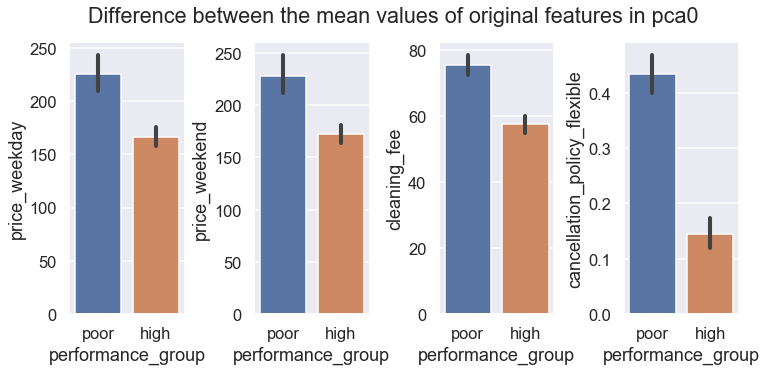

In [45]:
sns.set()
sns.set_context("talk")
figure, axes = plt.subplots(1,4, figsize=(12,5))
figure.subplots_adjust(wspace=0.6)
ax0 = sns.barplot(x='performance_group', y='price_weekday',data=df_listing_total, ax=axes[0])
ax1 = sns.barplot(x='performance_group', y="price_weekend",data=df_listing_total, ax=axes[1])
ax2 = sns.barplot(x='performance_group', y="cleaning_fee",data=df_listing_total, ax=axes[2])
ax3 = sns.barplot(x='performance_group', y='cancellation_policy_flexible', data=df_listing_total, ax=axes[3])
figure.suptitle("Difference between the mean values of original features in pca0")

There are 8 original features that are highly realted with the pca0 component.

- 'price' : weekday and weekend
- 'cleaning_fee'
- 'cancellation_policy' : flexible or not
- 'host_identity': verified or not
- 'amenities' : "Elevator in Building" or not
- 'calendar_updated' : more_than_1week or not
- 'amenities' : "Gym" or not
- 'host_acceptance_rate' : 100% or not

## Answer 3
## Accomodates for 2 people vs more than 2 people

In [46]:
df_listing_poor = df_listing_modi3_with_label[df_listing_modi3_with_label.y_label == 'poor']
df_listing_high = df_listing_modi3_with_label[df_listing_modi3_with_label.y_label == 'high']

In [47]:
# restore_df_listing_poor = restore_df_listing[restore_df_listing.y_label == 'poor']
restore_df_listing_high = df_listing_modi3_with_label[df_listing_modi3_with_label.y_label == 'high']
restore_df_listing_high.head(n=5)

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_nan,city_ALLSTON,city_Allston,city_Boston,city_Boston,city_Boston (Charlestown),city_Boston (Jamaica Plain),"city_Boston, Massachusetts, US",city_Brighton,city_Brighton,city_Brookline,city_Cambridge,city_Charlestown,city_Dorchester,city_East Boston

In [48]:
df_listing_high_more_2 = df_listing_high[df_listing_high.accommodates >2]
df_listing_high_equalorless_2 = df_listing_high[df_listing_high.accommodates <= 2]

In [49]:
# restore_df_listing_high_over2.describe().head(n=2)
mean_more_2 = df_listing_high_more_2.describe().iloc[1]

In [50]:
mean_equalorless_2 = df_listing_high_equalorless_2.describe().iloc[1]

In [51]:
df_more_2 = pd.DataFrame(data=mean_more_2.values, index=mean_more_2.index, columns=['for_4'])
df_equalorless_2 = pd.DataFrame(data=mean_equalorless_2.values, index=mean_equalorless_2.index, columns=['for_2'])
df_people = pd.concat([df_more_2, df_equalorless_2], axis=1)
df_people["difference"] = df_people['for_4'] - df_people['for_2']
df_people["difference"] = df_people["difference"].abs()

In [52]:
pd.set_option('display.max_rows', None)  
df_people.sort_values(by=['difference'], ascending=False)[0:20]

,for_4,for_2,difference
price_weekend,236.883694,119.138693,117.745001
price_weekday,226.650381,116.668998,109.981383
cleaning_fee,71.117740,46.228706,24.889034
unavail_days,119.941358,141.147583,21.206225
avail_days_weekdays,176.987654,160.959288,16.028367
avail_days_weekends,68.070988,62.893130,5.177858
accommodates,4.638889,1.862595,2.776293
beds,2.299383,1.062618,1.236764
guests_included,2.231481,1.170483,1.060998
bedrooms,1.620370,0.911593,0.708778


In [53]:
df_listing_modi3_high = df_listing_modi3_with_label[df_listing_modi3_with_label['y_label'] == 'high']
df_listing_modi3_high.head()
df_listing_modi3_high['accommodates_label'] = np.where(df_listing_modi3_high['accommodates']>2, 'for_4', 'for_2')
df_listing_modi3_high.head()

/Users/dalpengholic/anaconda3/envs/nbastat1/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_nan,city_ALLSTON,city_Allston,city_Boston,city_Boston,city_Boston (Charlestown),city_Boston (Jamaica Plain),"city_Boston, Massachusetts, US",city_Brighton,city_Brighton,city_Brookline,city_Cambridge,city_Charlestown,city_Dorchester,city_East Boston

Text(0.5, 0.98, 'Differencew between the host groups for 2 people and the host groups for more than 4 people')

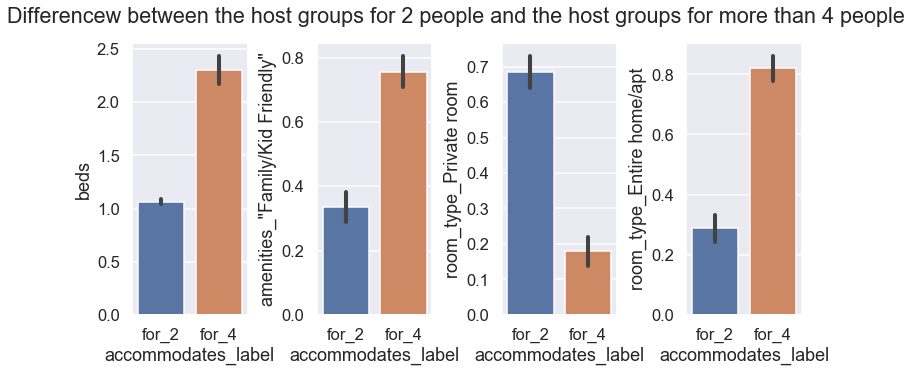

In [54]:
sns.set()
sns.set_context("talk")
figure, axes = plt.subplots(1,4, figsize=(12,5))
figure.subplots_adjust(wspace=0.6)
ax0 = sns.barplot(x='accommodates_label', y='beds', data=df_listing_modi3_high, ax=axes[0])
ax1 = sns.barplot(x='accommodates_label', y='amenities_"Family/Kid Friendly"', data=df_listing_modi3_high, ax=axes[1])
ax2 = sns.barplot(x='accommodates_label', y='room_type_Private room', data=df_listing_modi3_high, ax=axes[2])
ax3 = sns.barplot(x='accommodates_label', y='room_type_Entire home/apt', data=df_listing_modi3_high, ax=axes[3])
figure.suptitle("Differencew between the host groups for 2 people and the host groups for more than 4 people")
# plt.xticks(rotation=45)

## Short summary from the analysis

I started this project with three business questions mentioned below.

Business Questions :
- Q1. How is the price of Airbnb adjusted in terms of seasons and locations in Boston?
- Q2. What are the most relevant features of the groups over the 80 percentile and under the 20 percentile?
- Q3. What are the distinctive features in the 80 percetile group for 2 people travellers and more than 4 people travellers?
   
Quick answers for the questions are as follows.
- A1. Third week of April and The begining of September are the highest rental seasons. South Boston Waterfront shows the highest price, Mattapan shows the lowes price on average.

- A2. There are important features dividing the given dataset into the high performance group or the poor performance group. Some of them are 'price', 'available_days', cleaning_fee, 'cancellation_policy_flexible', 'host_response_rate', 'house_rules', 'extra_people_fee' and so on. The high performance group shows general tendency that the groups has less rental 'price' and 'cleaning_fee', but the more 'available days' and 'extra_people_fee' and strict 'house_rules' than the poor performance group. In addition, the high performance group tends to respond quickly and frequently to requests from guests.

- A3. The group for 2 people travellers in the 80 percetile group has 1 bed, less amenities for family, more private rooms for guests. In comparision to that group, the group for more than 4 people travellers has more than 2 beds, more amenities for family, and more entire home or apartement for guests


## Insight

- `Maximize your properties`: 'type of property', 'number of beds'
We all have limited properties. So it is a good start to know what kinds of properties that I can offer for Airbnb guests. For example, if I have a entire house and enough beds, I can manage it for guests more than four people. If I have only a private room, it is better to be used for a couple or one guest.


- `Do your best on basic stuff`: 'response rate', 'host verification', 'host acceptance', 'total available days'

From the perspective of travellers, people using Airbnb service will be more worried about the uncertain identification of hosts and sudden lost of contact compared to using well-known hotel service. So, offering verified information of host and quick response are easy basic stuff to be done. Of course, it is also important to increase availiable days for as mush as possilbe and not to be a picky host because if rooms for guest were empty, opportunities to make sales were diminished.

- `Offering affordable primary prices`: 'staying fee', 'cleaning fee'

The 80% percentile group showed that they offered lower basic price incluing fee for staying and cleaning than 20% percentile group. It looks like they knew that making their rooms occupied as many days as possible is critical. So it seems like they chose a strategy that givina a merit of primary prices to potential guests.

- `Preparing ways for preventing hosts from sudden cancellation and any property damage`: 'extra people fee' , 'cancellation policy', 'house rules'

It is recommended to have proper ways not to lose opportunities by sudden cancellation and to have damage of properties by guests. Like the 80% percentile group did, Having strict house rules and cancellation policy is nice way to safe both opportunities and properties of hosts. It is another way to make more sales to increase extra people fee.

- `Check the main events of local communities`

It is recommended to make your properties available for guests if there is a big local event in your area because it is expected people will visit your area more than other season. It is also a good idea that hosts could give some other traveling packages related to a event for the guests. For example, there is a sport event, hosts can give special meals for guests who are going to particiapted in the event.